# A diabetes dataset examined utilizing XGboost

#### The libraries will be imported first.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import warnings
!pip install xgboost==1.7.5
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.simplefilter(action="ignore", category=UserWarning)

## Import the dataset into a pandas dataframe using read_csv

Import dataset

In [12]:
# Import the dataset diabetes.csv into pandas dataframe, "df"
url = "https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/portfolio/diabetesXGBoost/diabetes.csv"
df = pd.read_csv(url)
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [13]:
# Pandas Info for basic information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#Pandas head to see the first 6 rows
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [15]:
# The 'outcomes' variable is set to find the number of outcomes for both positive and negative, normalized as a percentage.
outcomes = df.Outcome.value_counts(normalize=True)
#['Outcome'].count
print(outcomes)
# The 'outcomes2' variable is set to find the number of outcomes
outcomes2 = df.Outcome.value_counts()
print(outcomes2)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Outcome
0    500
1    268
Name: count, dtype: int64


## Training and Test dataset splits and Create Model.

The data is split into 70% training data and 30% test data. The training dataset is used to build the model and the test dataset is used to test the model to determine how well it predicts.

In [16]:
# "X" is set to all independent variables and "y" is set to the Outcome variable
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [17]:
# This step encodes string class values as integers to avoid errors in newer versions of XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

In [18]:
# Split data into training and test: "X_train, X_test, y_train, y_test"
# test_size = 0.3
# random_state = 7
# "eval_set" is set to the combination of X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set = [(X_test, y_test)]
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [19]:
print('Initializing xgboost.sklearn.XGBClassifier to starting training')

# "st" is set to the current datetime
st = datetime.now()

#  xgboost.sklearn.XGBClassifier is used to create the model "clf" with these parameters:
#     objective: "binary:logistic"
#     learning_rate: 0.05
#     seed: 9616
#     max_depth: 20, Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
#     gamma: 10, Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
#     n_estimators: 500
clf = xgboost.sklearn.XGBClassifier(
     objective="binary:logistic",
     learning_rate=0.05,
     seed=9616,
     max_depth=20,
     gamma=10,
     n_estimators=500)

# The training dataset is now fit to the model "clf" using these parameters:
#     early_stopping_rounds: 20
#     eval_metric: "auc"
#     eval_set: eval_set
#     verbose: False

clf.fit(X_train, y_train,
        early_stopping_rounds=20,
        eval_metric = "auc",
        eval_set = eval_set,
        verbose = False)

print(datetime.now()-st)

# "y_pred" set to the clf predictions on the test dataset.
y_pred = clf.predict(X_test)

# Accuracy score of the model output to the "accuracy" variable.
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)

print("Accuracy: %.10f%%" % (accuracy * 100.0))

# The ROC-AUC score for the model.
# Receiver Operating Characteristic Area Under the Curve, and it's a single number that measures how well a classifier can distinguish between positive and negative classes.
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)

print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


Initializing xgboost.sklearn.XGBClassifier to starting training
0:00:00.413367
Accuracy: 75.7575757576%
ROC-AUC: 72.7891156463%


#### View the feature importance results for the model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

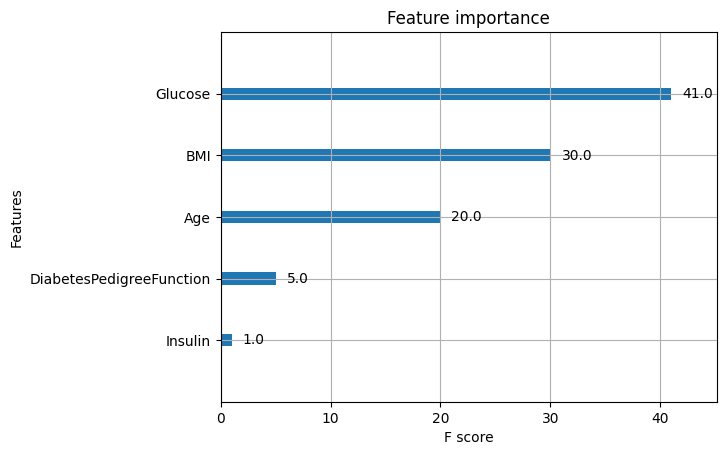

In [20]:
xgboost.plot_importance(clf)